In [46]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from wordcloud import WordCloud

In [26]:
df_apps=pd.read_csv('googleplaystore.csv')

In [27]:
df_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [28]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Comment
As we can see the Reviews, Price, Installs and Size are not numerical, so we should convert it. 

In [29]:
df_apps['Reviews'] = pd.to_numeric(df_apps['Reviews'], errors='coerce')

df_apps['Installs'] = df_apps['Installs'].str.replace(',', '', regex=False).str.replace('+', '', regex=False)

df_apps['Installs'] = pd.to_numeric(df_apps['Installs'], errors='coerce')

df_apps['Price'] = df_apps['Price'].str.replace('$', '', regex=False)

df_apps['Price'] = pd.to_numeric(df_apps['Price'], errors='coerce')

df_apps['Size'] = df_apps['Size'].replace('Varies with device', np.nan)

df_apps['Size'] = df_apps['Size'].str.replace('M', '', regex=False)

df_apps['Size'] = pd.to_numeric(df_apps['Size'], errors='coerce')

indexes_to_drop = df_apps[df_apps['Rating'] > 5].index

df_apps = df_apps.drop(indexes_to_drop)

print(df_apps[['Reviews', 'Installs', 'Price','Size']].dtypes)
print(df_apps[['Reviews', 'Installs', 'Price','Size']].head())


Reviews     float64
Installs    float64
Price       float64
Size        float64
dtype: object
    Reviews    Installs  Price  Size
0     159.0     10000.0    0.0  19.0
1     967.0    500000.0    0.0  14.0
2   87510.0   5000000.0    0.0   8.7
3  215644.0  50000000.0    0.0  25.0
4     967.0    100000.0    0.0   2.8


Text(0.5, 1.0, 'Distribution of Apps by Category')

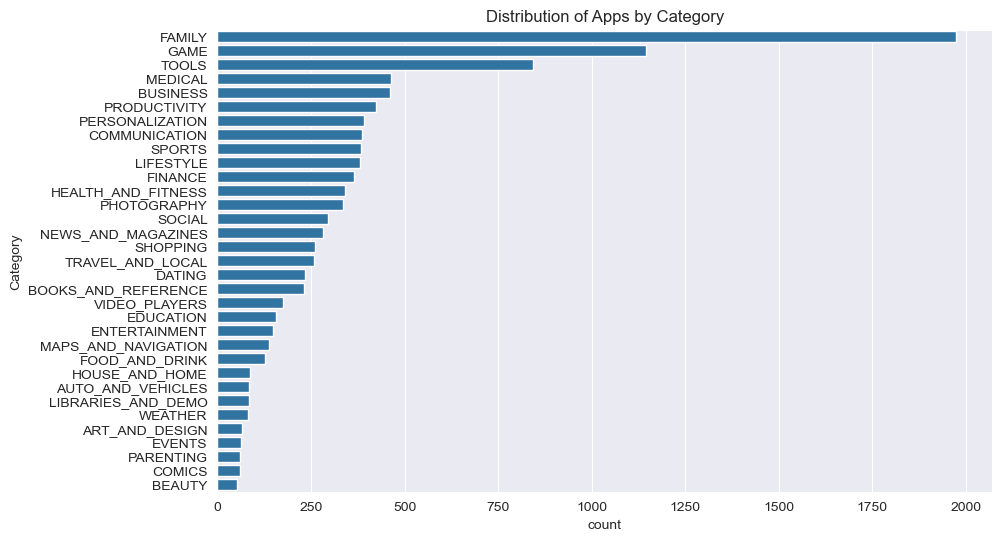

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Category', data=df_apps, order=df_apps['Category'].value_counts().index)
plt.title('Distribution of Apps by Category')

## Comment
The most popular category is "Family," with nearly 2,000 applications. This is likely because parents often install apps for their children to provide entertainment while maintaining control over the content. Many apps in the "Family" category, such as "YouTube Kids," offer parental control features to ensure safe usage.

The second most popular category is "Game," with over 1,100 apps. This is unsurprising, as gaming is a favorite pastime for many people who enjoy spending their free time playing mobile games.

The third most popular category is "Tools." These apps are essential for enhancing device functionality, such as improving productivity, managing files, or optimizing system performance. Users frequently download tools to make their smartphones more efficient and versatile for everyday tasks.

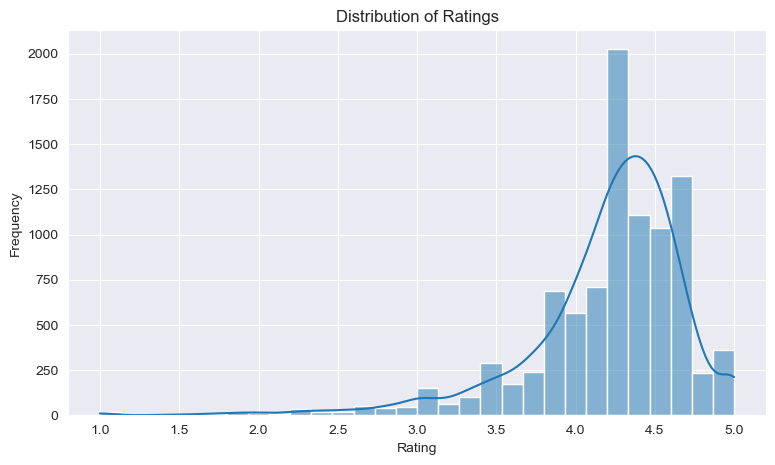

In [31]:
# Exploring the distribution of Ratings
plt.figure(figsize=(9, 5))
sns.histplot(df_apps['Rating'], bins=30, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

## Comment 
The histogram shows a right-skewed distribution, with most ratings clustering between 4.5 and 5.0. The peak frequency occurs at 5.0, indicating that users tend to rate apps positively, suggesting high satisfaction.

Very few apps receive ratings below 3.0, reflecting that most users do not rate apps poorly. This could imply that users tend to only review apps they enjoy or that they have had a positive experience with.

The high concentration of ratings at the top end of the scale could suggest that users are inclined to give favorable ratings. It could also reflect a lack of transparency regarding how ratings are aggregated or an influence of app marketing strategies that encourage positive reviews.

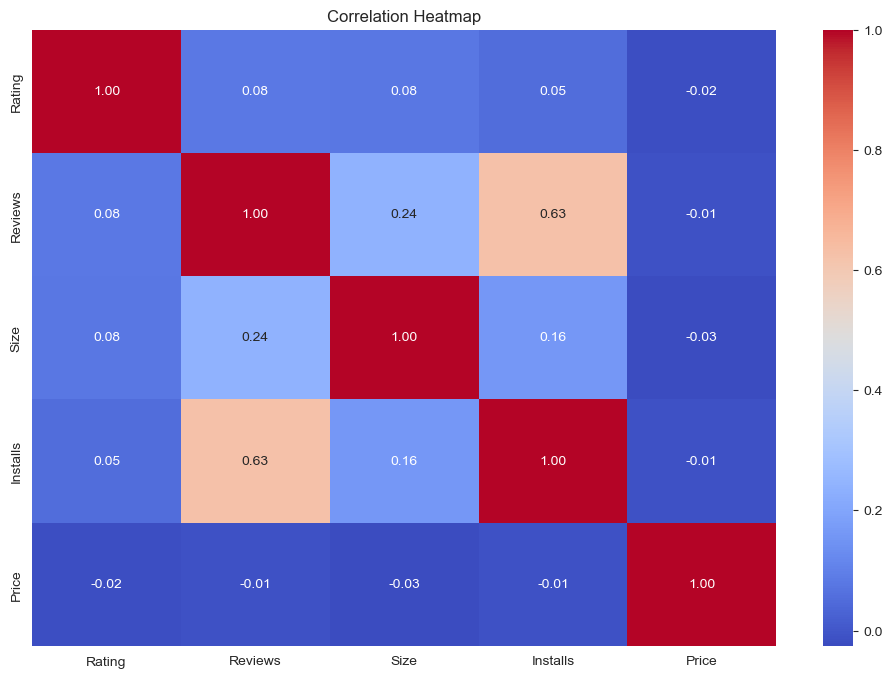

In [32]:
numerical_columns = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']

data_numeric = df_apps[numerical_columns].dropna()

corr_matrix = data_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Comment
We observe a strong correlation between Reviews and Installs, which makes sense as popular apps with more installs tend to receive more reviews. Additionally, there is a noticeable correlation between Size and Reviews, suggesting that app size influences user feedback. Larger apps may lead to dissatisfaction, possibly due to storage concerns or slower performance. Similarly, the correlation between Installs and Size implies that larger applications tend to have fewer installs, indicating that users may be less inclined to download apps that take up too much space.

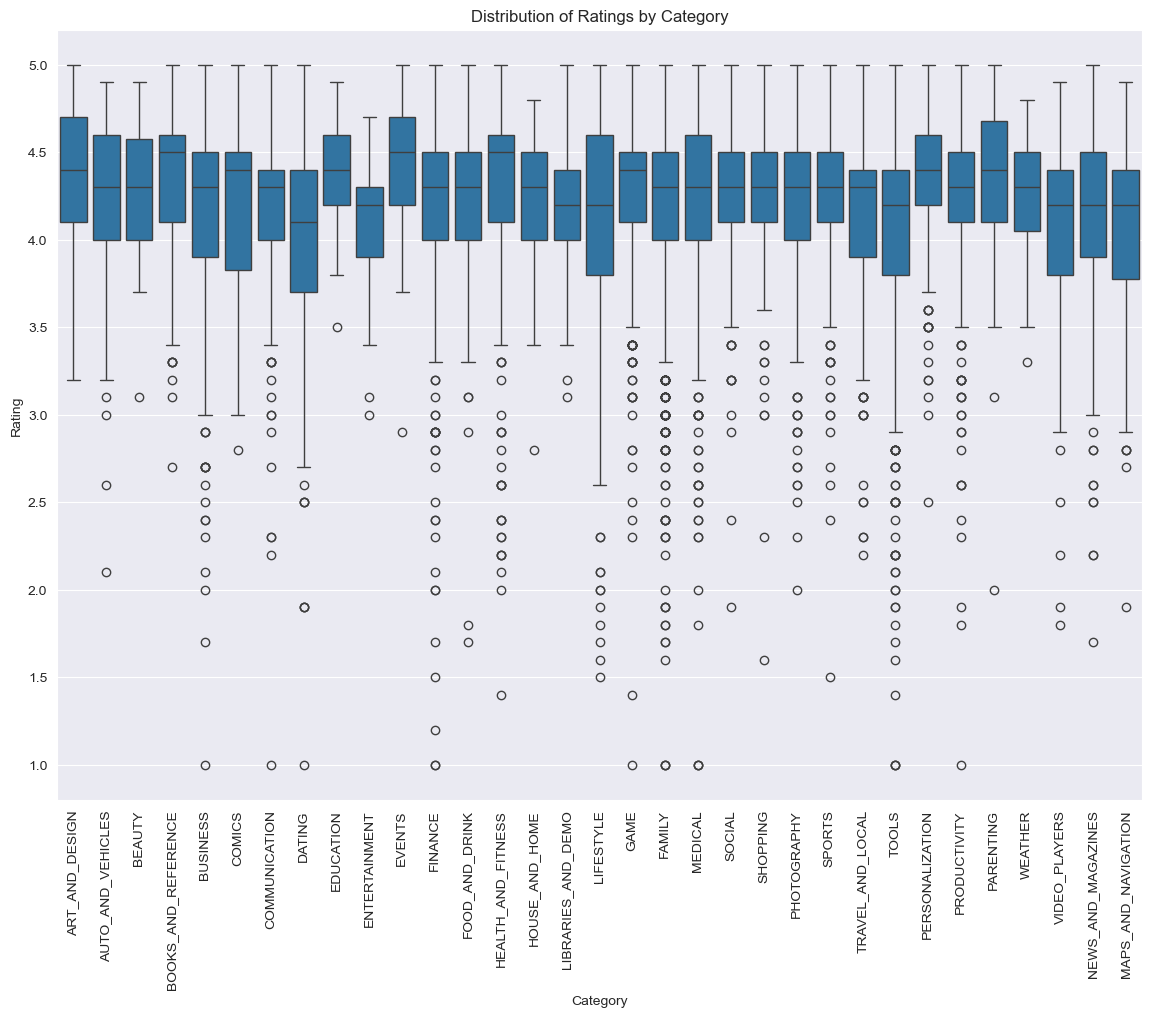

In [33]:
plt.figure(figsize=(14, 10))
sns.boxplot(x='Category', y='Rating', data=df_apps)
plt.xticks(rotation=90)
plt.title('Distribution of Ratings by Category')
plt.show()

## Comment
Here we have the most important observations:
1. Average Rating: Most categories have average ratings between 4.0 and 4.5, indicating generally high user satisfaction.
2. Rating Spread: Categories like "FINANCE", "GAME", "TOOLS" and "BUSINESS" show a wider spread, meaning there's a mix of high and low-rated apps.
3. High-Rated Categories: Categories like "EVENTS", "ART_AND_DESIGN," "BOOKS," and "EDUCATION" tend to have higher median ratings, closer to 4.5.
In summary, most apps receive high ratings, but a few categories show more variability and lower-rated outliers.

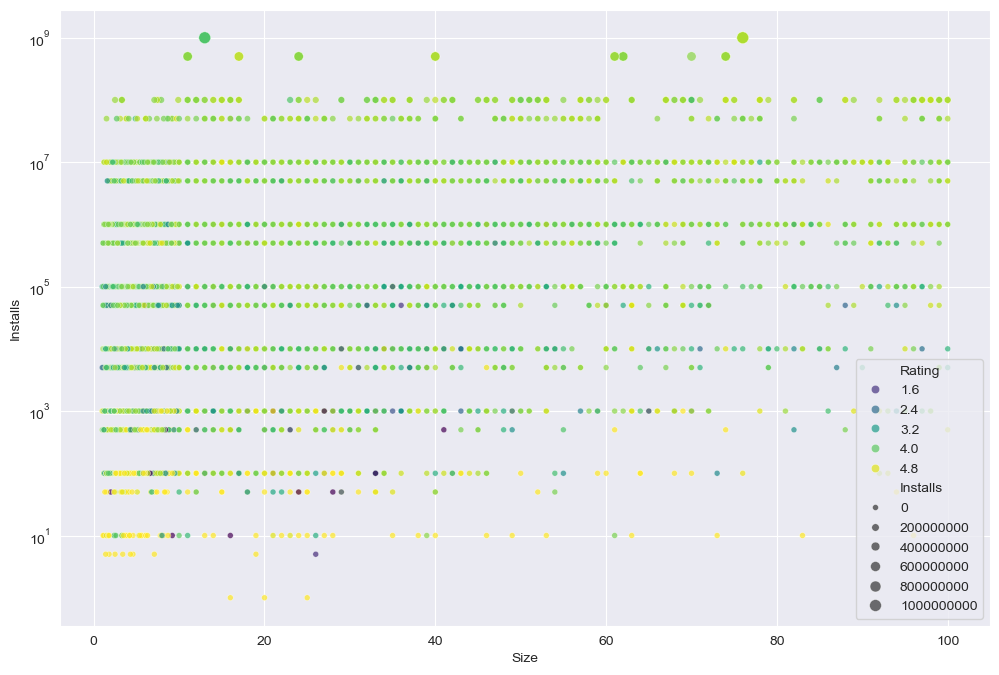

In [44]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Size', y='Installs', data=df_apps,hue='Rating',palette='viridis',size='Installs', alpha=0.7)
plt.yscale('log')

## Comment 
Here I have some observations:
1. App Size: Popular apps (with many installs) tend to fall within the 10-40 MB range, suggesting users may prefer moderately sized applications.
2. Installs: The y-axis shows installs on a logarithmic scale, indicating a wide range from just a few installs to billions. Most high-install apps cluster around mid-size, but there are exceptions.
3. Ratings: Higher-rated apps (4.0-4.8) are spread across different size and install ranges, while lower-rated ones (1.6-2.4) are less common. Higher ratings generally correlate with more installs, though not always.
4. Dot Size: The larger the dot, the more installs. Larger dots are mostly found in apps of moderate size.

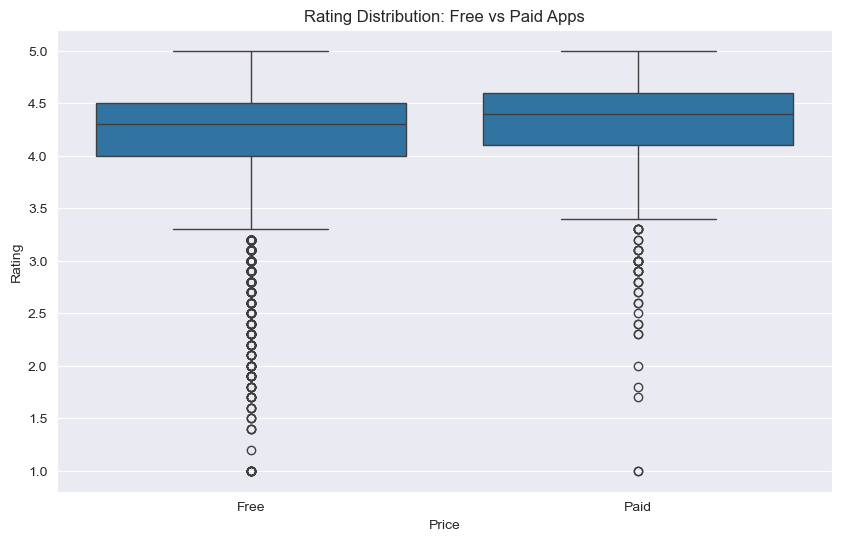

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=(df_apps['Price'] > 0).map({True: 'Paid', False: 'Free'}), y='Rating', data=df_apps)
plt.title('Rating Distribution: Free vs Paid Apps')
plt.show()


## Comment
The boxplot shows that while both free and paid apps have a similar median rating around 4.4, paid apps tend to perform slightly better. The distribution for paid apps is slightly more compact, with fewer outliers on the lower end, suggesting that users generally have a more consistent and positive experience with paid apps. Free apps, on the other hand, have a higher number of low-rating outliers, indicating that they may provide a more varied experience, with some users rating them poorly.

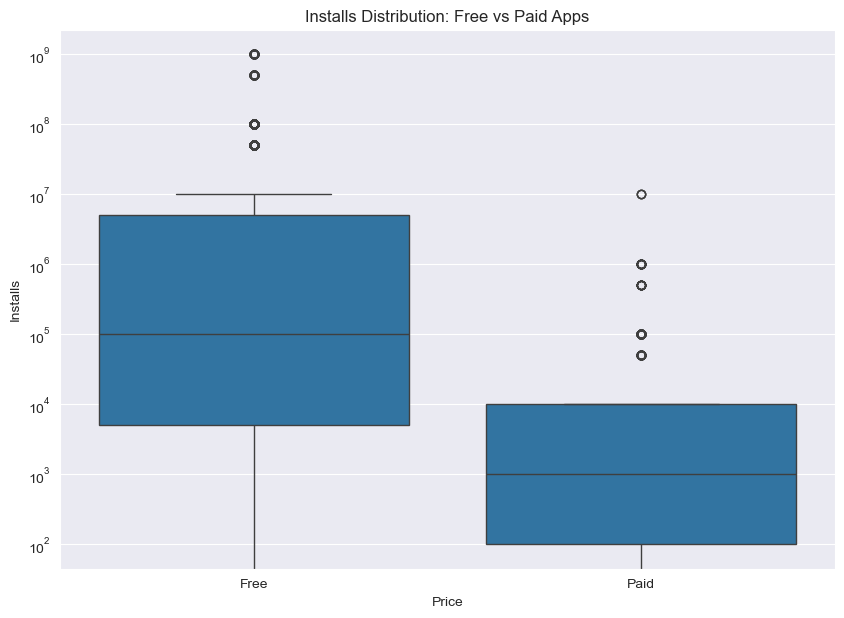

In [55]:
plt.figure(figsize=(10, 7))
sns.boxplot(x=(df_apps['Price'] > 0).map({True: 'Paid', False: 'Free'}), y='Installs', data=df_apps)
plt.yscale('log')  
plt.title('Installs Distribution: Free vs Paid Apps')
plt.show() 

## Comment
Free apps tend to have significantly higher installation rates, indicating that users are generally more inclined to download free applications. However, there are notable outliers among paid apps, suggesting that it is indeed possible for a paid application to achieve considerable success.

In summary, while free applications are more commonly installed, integrating monetization strategies—such as offering premium features or subscriptions within a free app (as seen with services like Netflix)—can be an effective approach for maximizing revenue while still attracting a large user base.

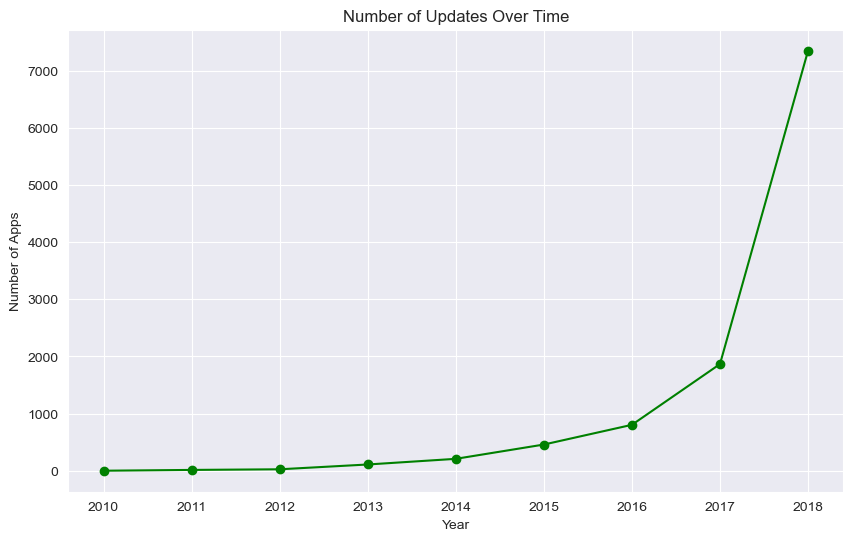

In [57]:
df_apps['Last Updated'] = pd.to_datetime(df_apps['Last Updated'], errors='coerce')
df_apps['Year'] = df_apps['Last Updated'].dt.year

apps_by_year = df_apps.groupby('Year').size()

plt.figure(figsize=(10, 6))
apps_by_year.plot(kind='line', marker='o', color='green')
plt.title('Number of Updates Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Apps')
plt.grid(True)
plt.show()

## Comment
The number of applications significantly grows from 2016. It shows that after 2016 people started creating and updating their apps. In that years applications many people started creating their own apps and games. 

Text(0.5, 1.0, 'Distribution of Apps by Category')

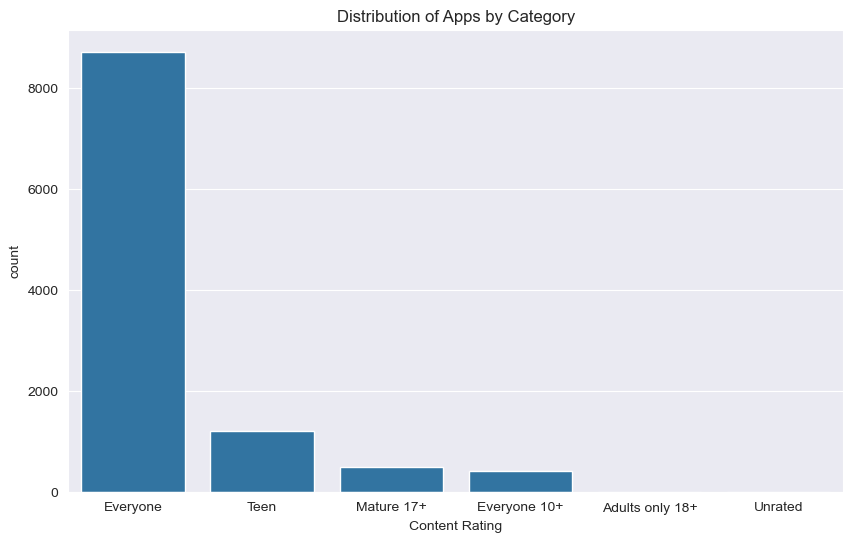

In [58]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Content Rating', data=df_apps, order=df_apps['Content Rating'].value_counts().index)
plt.title('Distribution of Apps by Content Rating')

## Comment 
The most applications are for Everyone, so everyone can use it. The second category is for 'Teen'. It can be surprise information because a lot of teenagers are using smartphones and for them should be more apps. next we havec 'Mature 17+', so applications for older audience. Not many people use that type of apps. 

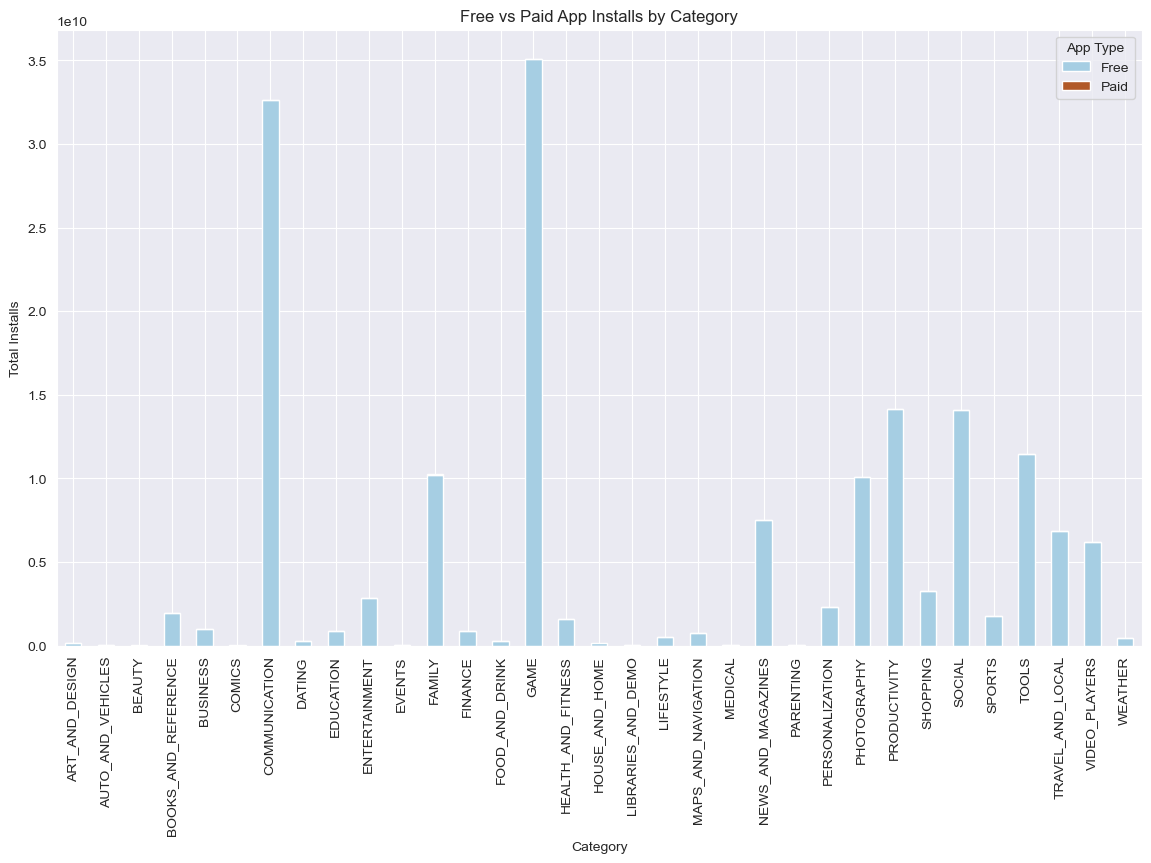

In [60]:
df_apps['App Type'] = df_apps['Price'].apply(lambda x: 'Paid' if x > 0 else 'Free')

install_dist = df_apps.groupby(['Category', 'App Type'])['Installs'].sum().unstack()

install_dist.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Paired')

plt.title('Free vs Paid App Installs by Category')
plt.ylabel('Total Installs')
plt.xlabel('Category')

plt.xticks(rotation=90)

plt.show()

## Comment
The most installs have the categories: "GAME" and "COMMUNICATION". It indicates that most phones have at least 1 game and 1 app to communication. What is interesitng the categories "EVENTS", "ART AND DESIGN" and "EDUCATION" which had the best rating, have little installs. Means that, the more installs the application have, the worse rating will have.
